In [10]:
import pandas as pd #csv파일을 읽기위함
import numpy as np #행렬연산
import matplotlib.pyplot as plt # 데이터 시각화
from keras.models import Sequential #딥러닝 모델 작성
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime
import time

In [2]:
#Load Dataset

data = pd.read_csv('C:/Users/rqt92/samsung.csv') # csv파일 로드
data.head() # 데이터 프레임의 맨앞 5줄 데이터 출력

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-15,50300,50560,49860,50400,14997.43066,10757300
1,2017-09-18,50540,52480,50520,52480,15616.37305,11524950
2,2017-09-19,52500,52640,51780,52120,15509.24902,9850400
3,2017-09-20,52120,52500,51840,52220,15539.00488,9292750
4,2017-09-21,52220,52960,52220,52800,15711.59375,8839800


In [3]:
#compute mid price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2 #midprice로 예측

In [4]:
#Create Windows
#window의 개념: 
# 50개와 1개의 데이터를 묶는다.(앞 50개의 데이터로 다음 1개의 데이터 예측)
# 그 다음 윈도우는 한칸씩 밀려난 셋

seq_len = 100 #며칠간의 데이터를 보고 내일것을 예측할거냐
sequence_length = seq_len + 1 #50개를 보고 1개를 예측 //51개 데이터를 한 window로 만듦

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length]) 
    
# result라는 리스트에 51개씩 저장

In [5]:
# Normalize Data 정규화를 함으로 더 예측이 확실해짐
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9)) #전체 데이터의 90%를 트레이닝셋
train = result[:row, :]
np.random.shuffle(train) #랜덤으로 섞는다

x_train = train[:, :-1] #50일간의 데이터셋으로
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1] #나머지 1일 예측

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((564, 100, 1), (63, 100, 1), (564,), (63,))

In [6]:
#Build a Model
model = Sequential() #모델을 순차적으로 정의하는 클래스

model.add(LSTM(100, return_sequences=True,input_shape=(100, 1))) 

model.add(LSTM(64, return_sequences=False))
 #           ------ 조정하면 서 성능테스트
model.add(Dense(1, activation='linear'))
#              ---output 개수: 다음날 하루의 output
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 83,105
Trainable params: 83,105
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10, #한번에 10개씩 묶어서 학습시킨다
    epochs=500) #20번 반복

Epoch 1/500
57/57 [==============================] - 1s 20ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 2/500
57/57 [==============================] - 1s 10ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 3/500
57/57 [==============================] - 1s 9ms/step - loss: 0.0010 - val_loss: 7.2628e-04
Epoch 4/500
57/57 [==============================] - 1s 10ms/step - loss: 8.2336e-04 - val_loss: 6.8717e-04
Epoch 5/500
57/57 [==============================] - 1s 9ms/step - loss: 6.9554e-04 - val_loss: 6.0550e-04
Epoch 6/500
57/57 [==============================] - 1s 9ms/step - loss: 5.3406e-04 - val_loss: 5.7920e-04
Epoch 7/500
57/57 [==============================] - 1s 9ms/step - loss: 4.8823e-04 - val_loss: 5.1856e-04
Epoch 8/500
57/57 [==============================] - 1s 9ms/step - loss: 4.1163e-04 - val_loss: 9.7254e-04
Epoch 9/500
57/57 [==============================] - 1s 9ms/step - loss: 4.0647e-04 - val_loss: 3.8453e-04
Epoch 10/500
57/57 [==============================] - 

Epoch 77/500
57/57 [==============================] - 1s 10ms/step - loss: 2.6194e-04 - val_loss: 2.7514e-04
Epoch 78/500
57/57 [==============================] - 1s 9ms/step - loss: 2.5358e-04 - val_loss: 2.3956e-04
Epoch 79/500
57/57 [==============================] - 1s 10ms/step - loss: 2.6038e-04 - val_loss: 2.6946e-04
Epoch 80/500
57/57 [==============================] - 1s 9ms/step - loss: 2.5494e-04 - val_loss: 2.8490e-04
Epoch 81/500
57/57 [==============================] - 1s 10ms/step - loss: 2.6046e-04 - val_loss: 3.4432e-04
Epoch 82/500
57/57 [==============================] - 1s 9ms/step - loss: 2.5040e-04 - val_loss: 4.5100e-04
Epoch 83/500
57/57 [==============================] - 1s 9ms/step - loss: 2.5124e-04 - val_loss: 2.4314e-04
Epoch 84/500
57/57 [==============================] - 1s 9ms/step - loss: 2.6042e-04 - val_loss: 2.6312e-04
Epoch 85/500
57/57 [==============================] - 1s 9ms/step - loss: 2.4579e-04 - val_loss: 2.3801e-04
Epoch 86/500
57/57 [=====

57/57 [==============================] - 1s 10ms/step - loss: 2.3721e-04 - val_loss: 2.5134e-04
Epoch 152/500
57/57 [==============================] - 1s 10ms/step - loss: 2.4068e-04 - val_loss: 2.6104e-04
Epoch 153/500
57/57 [==============================] - 1s 10ms/step - loss: 2.3953e-04 - val_loss: 2.4893e-04
Epoch 154/500
57/57 [==============================] - 1s 10ms/step - loss: 2.3960e-04 - val_loss: 2.8900e-04
Epoch 155/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2729e-04 - val_loss: 2.4344e-04
Epoch 156/500
57/57 [==============================] - 1s 11ms/step - loss: 2.2980e-04 - val_loss: 3.2501e-04
Epoch 157/500
57/57 [==============================] - 1s 10ms/step - loss: 2.3942e-04 - val_loss: 2.7881e-04
Epoch 158/500
57/57 [==============================] - 1s 10ms/step - loss: 2.3883e-04 - val_loss: 3.6047e-04
Epoch 159/500
57/57 [==============================] - 1s 10ms/step - loss: 2.3882e-04 - val_loss: 2.4694e-04
Epoch 160/500
57/57 [===

57/57 [==============================] - 1s 10ms/step - loss: 2.2594e-04 - val_loss: 2.5141e-04
Epoch 226/500
57/57 [==============================] - 1s 9ms/step - loss: 2.2921e-04 - val_loss: 2.7781e-04
Epoch 227/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2900e-04 - val_loss: 2.7054e-04
Epoch 228/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2615e-04 - val_loss: 2.8109e-04
Epoch 229/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2584e-04 - val_loss: 3.1288e-04
Epoch 230/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2036e-04 - val_loss: 2.8254e-04
Epoch 231/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2849e-04 - val_loss: 3.1739e-04
Epoch 232/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2187e-04 - val_loss: 2.4881e-04
Epoch 233/500
57/57 [==============================] - 1s 10ms/step - loss: 2.2565e-04 - val_loss: 2.9247e-04
Epoch 234/500
57/57 [====

57/57 [==============================] - 1s 10ms/step - loss: 2.2543e-04 - val_loss: 2.6391e-04
Epoch 300/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1749e-04 - val_loss: 2.6414e-04
Epoch 301/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1920e-04 - val_loss: 3.0366e-04
Epoch 302/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1614e-04 - val_loss: 2.8242e-04
Epoch 303/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1303e-04 - val_loss: 2.8407e-04
Epoch 304/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1754e-04 - val_loss: 2.8616e-04
Epoch 305/500
57/57 [==============================] - 1s 10ms/step - loss: 2.0667e-04 - val_loss: 2.9290e-04
Epoch 306/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1655e-04 - val_loss: 2.6418e-04
Epoch 307/500
57/57 [==============================] - 1s 10ms/step - loss: 2.1478e-04 - val_loss: 2.9120e-04
Epoch 308/500
57/57 [===

57/57 [==============================] - 1s 10ms/step - loss: 2.0139e-04 - val_loss: 3.0778e-04
Epoch 374/500
57/57 [==============================] - 1s 10ms/step - loss: 1.9993e-04 - val_loss: 2.9740e-04
Epoch 375/500
57/57 [==============================] - 1s 10ms/step - loss: 1.9925e-04 - val_loss: 4.1789e-04
Epoch 376/500
57/57 [==============================] - 1s 9ms/step - loss: 2.0740e-04 - val_loss: 2.9456e-04
Epoch 377/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8497e-04 - val_loss: 4.8246e-04
Epoch 378/500
57/57 [==============================] - 1s 10ms/step - loss: 2.0821e-04 - val_loss: 3.5136e-04
Epoch 379/500
57/57 [==============================] - 1s 10ms/step - loss: 2.0173e-04 - val_loss: 3.3369e-04
Epoch 380/500
57/57 [==============================] - 1s 10ms/step - loss: 1.9856e-04 - val_loss: 3.0528e-04
Epoch 381/500
57/57 [==============================] - 1s 9ms/step - loss: 1.9807e-04 - val_loss: 3.5954e-04
Epoch 382/500
57/57 [=====

57/57 [==============================] - 1s 10ms/step - loss: 1.8778e-04 - val_loss: 3.3356e-04
Epoch 448/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8306e-04 - val_loss: 3.2188e-04
Epoch 449/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8715e-04 - val_loss: 3.1579e-04
Epoch 450/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8189e-04 - val_loss: 3.7302e-04
Epoch 451/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8311e-04 - val_loss: 3.4828e-04
Epoch 452/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8383e-04 - val_loss: 3.2515e-04
Epoch 453/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8479e-04 - val_loss: 3.2996e-04
Epoch 454/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8936e-04 - val_loss: 3.4516e-04
Epoch 455/500
57/57 [==============================] - 1s 10ms/step - loss: 1.8273e-04 - val_loss: 3.6427e-04
Epoch 456/500
57/57 [===

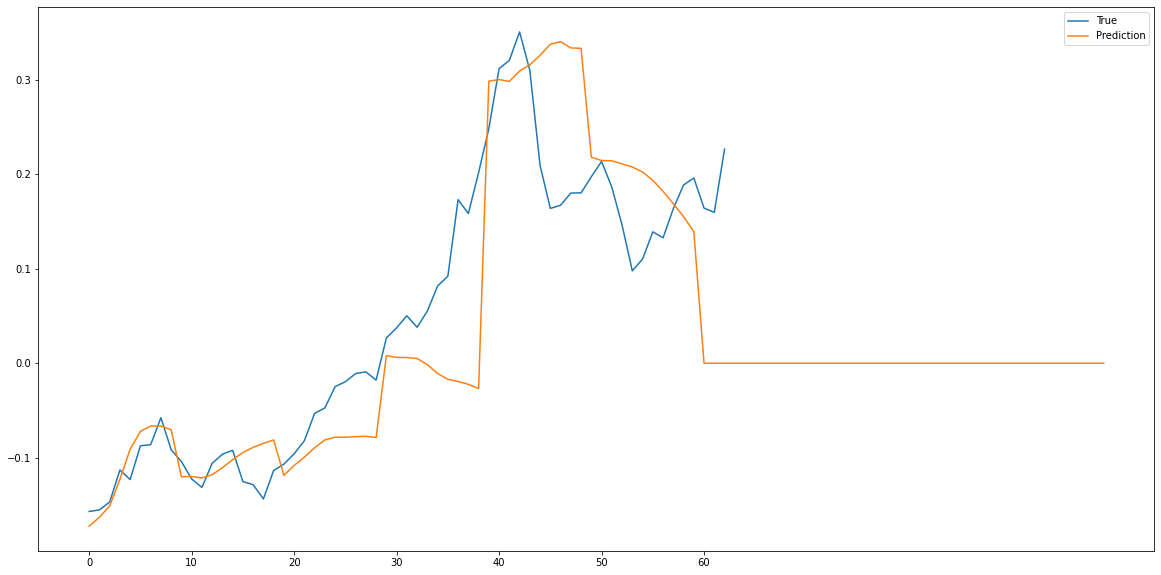

In [8]:
#Prediction



origin_seq_in = np.array(x_test)
seq_in = origin_seq_in[0]
seq_count = 0

seq_out = seq_in
pred = np.zeros((100,1))

for i in range(60):
    seq_count = seq_count + 1
    if seq_count % 10 == 0 :
         
        seq_in = origin_seq_in[seq_count]
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in,(1,100,1))

    pred_out = model.predict(sample_in)
    
    #print(pred_out)
    seq_in = np.append(seq_in, pred_out,axis=0)
    
    #seq_in.append(pred_out[0,0])
    #seq_in.pop(0)
    seq_in = np.delete(seq_in, [0,0], axis=0)
    pred[i,0] = pred_out[0,0]
    #print(seq_in)
fig = plt.figure(facecolor='white',figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.xticks([0, 10, 20, 30, 40, 50, 60])

plt.show()
    



# sample_in = np.array(x_test)
# print(x_test.shape)
# pred = model.predict(x_test)
# print(pred)
# fig = plt.figure(facecolor='white')
# ax = fig.add_subplot(111)
# ax.plot(y_test, label='True')
# ax.plot(pred, label='Prediction')
# ax.legend()
# plt.show()


# #Prediction
# pred = model.predict(x_test)

# fig = plt.figure(facecolor='white')
# ax = fig.add_subplot(111)
# ax.plot(y_test, label='True')
# ax.plot(pred, label='Prediction')
# ax.legend()
# plt.show()

In [13]:
timestamp = time.strftime('%Y%m%d%H%M')
model.save('weights/{}-lstm.h5'.format(timestamp))